In [ ]:
!pip install google-play-scraper transformers -q

# Import Library

In [ ]:
from google_play_scraper import Sort, reviews

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from transformers import pipeline

# Read Data

In [ ]:
result, continuation_token = reviews(
    'com.quora.android',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.NEWEST
    count=15000, # defaults to 100
    filter_score_with=None # defaults to None(means all score)
)

In [ ]:
result[0]

{'reviewId': '9cfed351-b5e6-46a0-9647-5c607b00c3d9',
 'userName': 'A Google user',
 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
 'content': "Two big big problems with this app: 1. It's all over the place when reading posts and doesn't stay where you are at if you have to switch windows to look something up or the screen times out, and you go back in. 2. There is no way to save what you are writing if you want to do this, and for the very same reasons as #1. I have lost a good amount of writing answers, and I have to resort to editing in another app and then hunt for the article I want to post to.",
 'score': 2,
 'thumbsUpCount': 94,
 'reviewCreatedVersion': '3.2.28',
 'at': datetime.datetime(2024, 7, 4, 14, 46, 18),
 'replyContent': None,
 'repliedAt': None,
 'appVersion': '3.2.28'}

In [ ]:
data_list = [i for i in result]
df = pd.DataFrame(data_list)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9cfed351-b5e6-46a0-9647-5c607b00c3d9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Two big big problems with this app: 1. It's al...,2,94,3.2.28,2024-07-04 14:46:18,None,NaT,3.2.28
1,9da23680-d4a1-4d37-a753-c45e7727be9b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Switches articles while I'm reading and makes ...,1,1966,3.2.23,2024-03-01 19:39:54,None,NaT,3.2.23
2,1b9cd3fc-bfa3-477a-bec4-ce4b0b9744ae,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This app used to be one of my favorites, and I...",2,452,2.8.36,2024-06-10 21:56:02,None,NaT,2.8.36
3,ea688c62-f18c-4bf3-adae-b09a2f97ab56,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Trying to type answers with a physical keyboar...,3,178,2.8.4,2019-05-07 13:13:52,None,NaT,2.8.4
4,c0a6d6ad-92b9-46bc-adf2-ed953ca0914f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app rarely works. Attempting to open ques...,2,3445,3.1.18,2022-05-27 17:39:31,We're sorry to hear about this issue. To help ...,2022-05-29 00:56:04,3.1.18


In [ ]:
columns = ['at', 'content', 'score']
df = df[columns].sort_values(by='at', ascending=True)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 11106 to 9223
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   at       15000 non-null  datetime64[ns]
 1   content  15000 non-null  object        
 2   score    15000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 468.8+ KB


In [ ]:
df.head()

,at,content,score
11106,2018-09-12 07:25:15,"Beside being a yappy left leaning app, it used...",2
11320,2018-09-12 08:07:33,This is one of the best apps i've ever used in...,5
3130,2018-09-12 09:30:45,After the recent update the feeds are not load...,1
5841,2018-09-12 10:45:57,"The Quora as a social network is great,but the...",3
478,2018-09-12 11:11:41,Please improve the user experience. It's prett...,3


# Data Labeling

In [ ]:
model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
sentiment_classifier = pipeline('sentiment-analysis', model=model_name, tokenizer=model_name, device='cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
def classify_sentiment(text):
    result = sentiment_classifier(text)
    return result[0]['label']

In [ ]:
df['sentiment'] = df['content'].apply(classify_sentiment)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
df['sentiment'].value_counts()

sentiment
negative    9065
positive    5099
neutral      836
Name: count, dtype: int64

# EDA

In [ ]:
df['date'] = df['at'].dt.strftime('%Y-%m-%d')

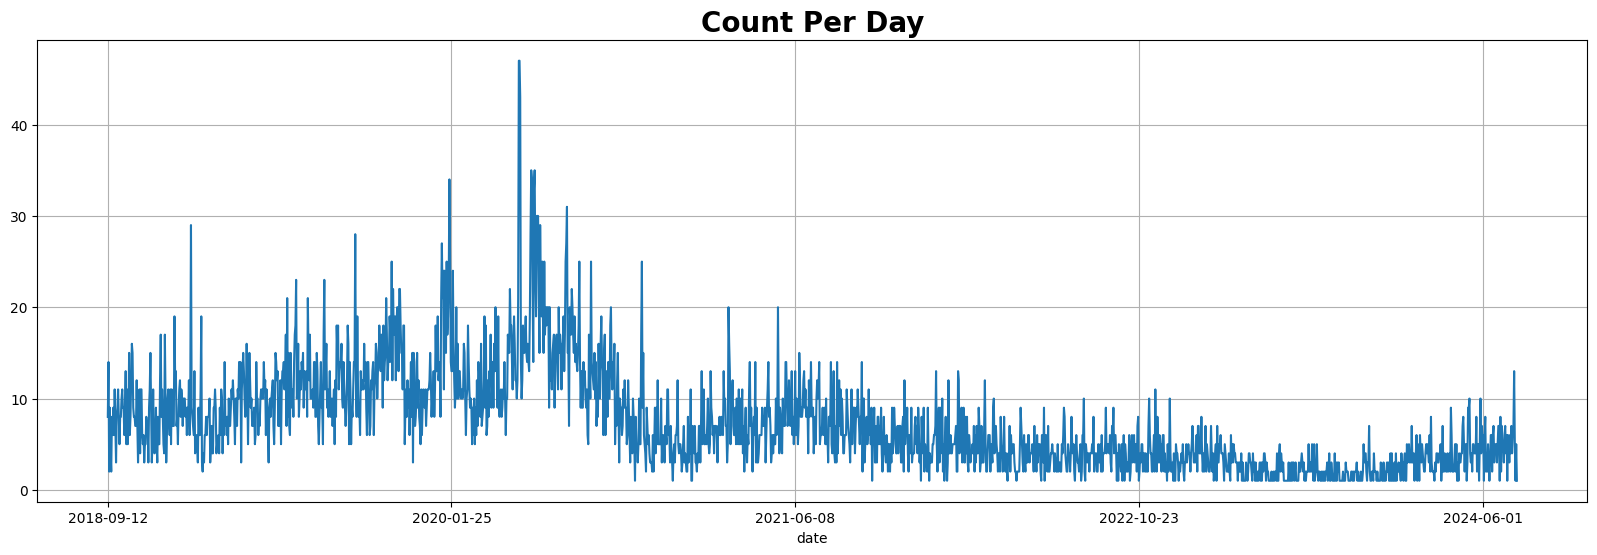

In [ ]:
# Count the number of occurrences per day
daily_counts = df['date'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(20, 6))
daily_counts.plot(kind='line')
plt.title('Count Per Day', fontsize=20, fontweight='bold')

# Show the plot
plt.grid(True)
plt.show()

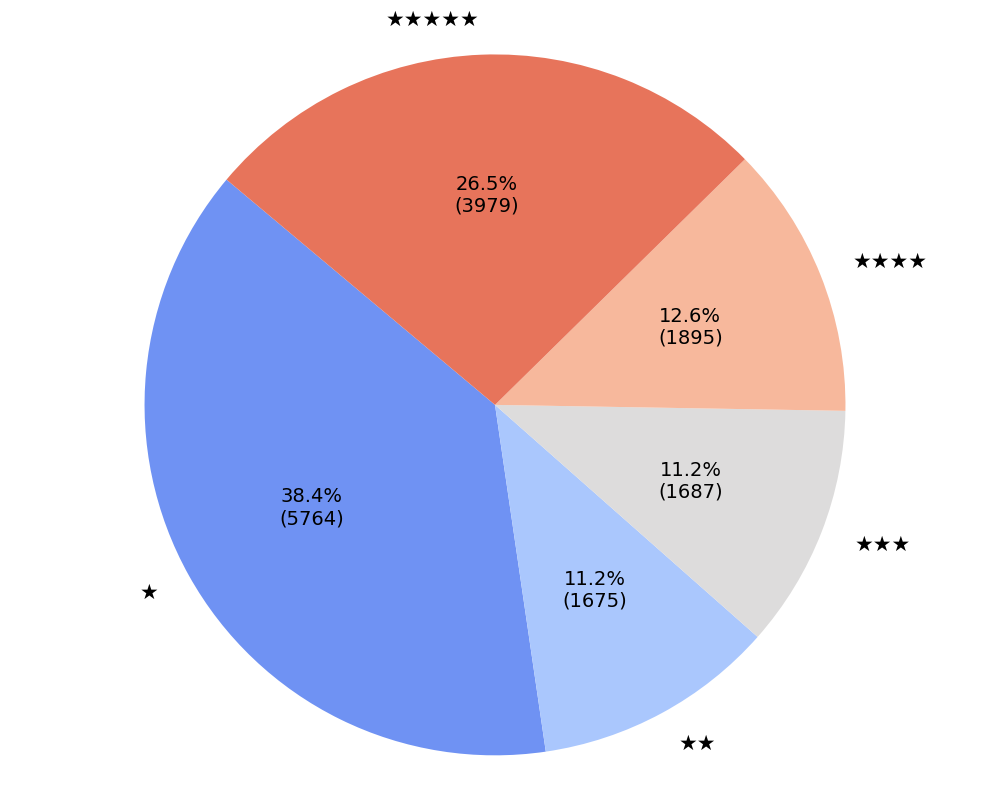

In [ ]:
# Count the number of occurrences per rating
rating = df['score'].value_counts().sort_index()

# Map scores to star ratings (example mapping)
star_labels = {
    1: '★',
    2: '★★',
    3: '★★★',
    4: '★★★★',
    5: '★★★★★'
}

# Colors for the pie chart
colors = sns.color_palette('coolwarm', len(rating))

# Create the plot
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(rating, labels=rating.index.map(star_labels), autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})

# Adjusting the size of star symbols
for text in texts:
    text.set_fontsize(15)

# Adding the count to the percentage text
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{autotext.get_text()}\n({rating.iloc[i]})')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df[['content', 'sentiment']].to_csv('dataset.csv', index=False)